In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [20]:
def pega_data(linha):
    return linha[:15]

In [21]:
def pega_nome(linha):
    nome = ''
    for i in linha[18:]:
        if i == ':':
            return nome
        nome += i

In [22]:
def pega_texto(linha):
    linha2 = linha[18:]
    if ':' in linha2:
        return linha2[linha2.index(':') + 1:]
    else:
        return None

In [23]:
def cria_dic(linha):
    dic = {}
    dic['data'] = pega_data(linha)
    dic['nome'] = pega_nome(linha)
    dic['texto']= pega_texto(linha)
    
    return dic
    

In [24]:
def cria_lista_dics(arquivo):
    lista = []
    for linha in arquivo.readlines():
        lista.append(cria_dic(linha))
        
    return lista

In [177]:
arquivo_conectivo = open('Conversa do WhatsApp com Conectivo.txt', 'r')

In [178]:
arquivo_cognitivo = open('Conversa do WhatsApp com Cognitivo.ai.txt', 'r')

In [180]:
lista_dics_conectivo = cria_lista_dics(arquivo_conectivo)

In [181]:
lis_dics_cognitivo = cria_lista_dics(arquivo_cognitivo)

In [182]:
df = pd.DataFrame(lista_dics_conectivo + lis_dics_cognitivo)

In [183]:
df.head(10)

,data,nome,texto
0,"21/11/16, 14:25",None,None
1,"13/10/15, 13:06",None,None
2,"21/11/16, 14:25",None,None
3,"21/11/16, 14:25",‪+55 21 99445-8762‬,done\n
4,"21/11/16, 14:27",Evandro,"Cloves, acho que todo mundo já te conhece\n"
5,"21/11/16, 14:27",Evandro,Seja bem vindo\n
6,"21/11/16, 14:28",Camile,Bem vindooo 🎉\n
7,"21/11/16, 15:10",Cloves Adriano,😃\n
8,"21/11/16, 15:10",Cloves Adriano,Valeu pessoal\n
9,"21/11/16, 15:12",‪+55 21 99800-0857‬,Bem vindo!\n


In [185]:
df2 = df.dropna()

In [186]:
df2.head(10)

,data,nome,texto
3,"21/11/16, 14:25",‪+55 21 99445-8762‬,done\n
4,"21/11/16, 14:27",Evandro,"Cloves, acho que todo mundo já te conhece\n"
5,"21/11/16, 14:27",Evandro,Seja bem vindo\n
6,"21/11/16, 14:28",Camile,Bem vindooo 🎉\n
7,"21/11/16, 15:10",Cloves Adriano,😃\n
8,"21/11/16, 15:10",Cloves Adriano,Valeu pessoal\n
9,"21/11/16, 15:12",‪+55 21 99800-0857‬,Bem vindo!\n
10,"21/11/16, 16:51",‪+55 21 99445-8762‬,pessoal.. a entrevista de 18 pode ir pra 18:1...
11,"21/11/16, 16:51",‪+55 21 99445-8762‬,só pra facilitar aqui..\n
12,"21/11/16, 17:02",Raul Magno,Sim\n


In [198]:
df2 = df2[df2['nome'].str.contains("55") == False]

In [204]:
df2.nome.unique()

array(['Evandro', 'Camile', 'Cloves Adriano', 'Raul Magno', 'Andre Nunes',
       'Vinicius Cognitivo. ai', 'Dornelas', 'Robson',
       ' informa\xc3\xa7\xc3\xb5es e inscri\xc3\xa7\xc3\xb5es',
       ' do Chrome Web Store', 'Paula Arantes',
       'u combinei com o Evandro foram'], dtype=object)

In [214]:
df2 = df2[-df2["nome"].isin([" informa\xc3\xa7\xc3\xb5es e inscri\xc3\xa7\xc3\xb5es",
                             " do Chrome Web Store", "u combinei com o Evandro foram"])]

In [215]:
df2.head()

,data,nome,texto
4,"21/11/16, 14:27",Evandro,"Cloves, acho que todo mundo já te conhece\n"
5,"21/11/16, 14:27",Evandro,Seja bem vindo\n
6,"21/11/16, 14:28",Camile,Bem vindooo 🎉\n
7,"21/11/16, 15:10",Cloves Adriano,😃\n
8,"21/11/16, 15:10",Cloves Adriano,Valeu pessoal\n


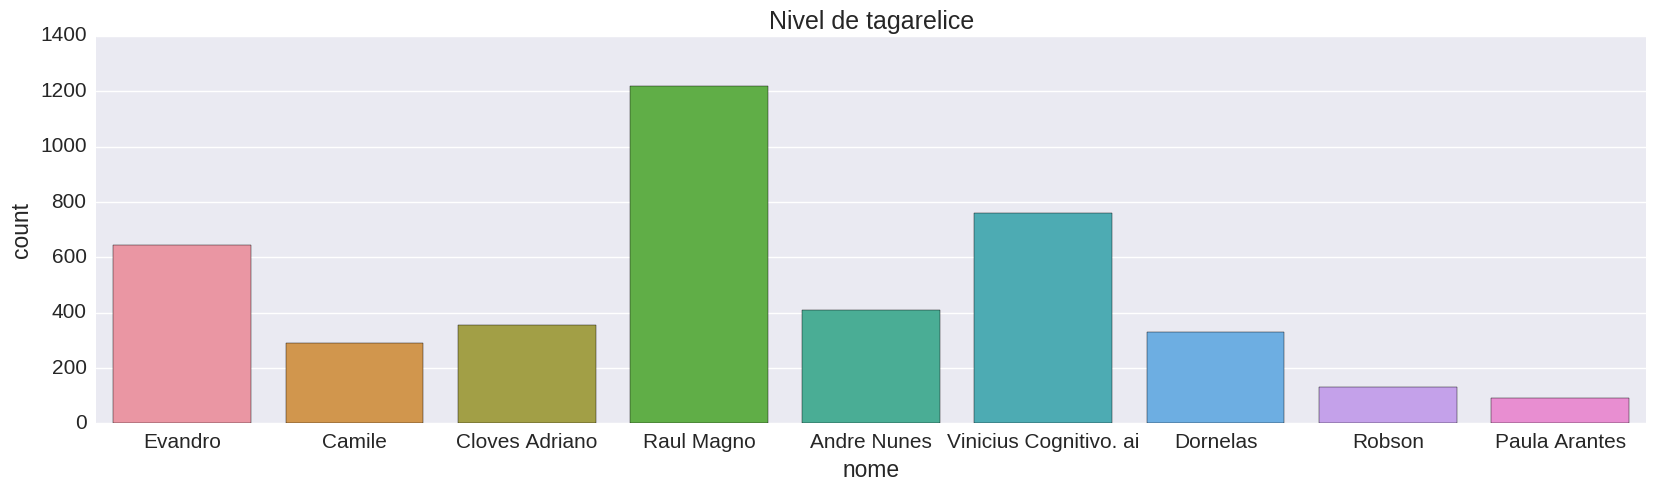

In [216]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 5)
sns.countplot(x='nome', data=df2).set_title('Nivel de tagarelice');

In [217]:
def palavra_no_texto(palavra, texto):
    '''
    Esta função verifica se a 'palavra' 
    existe no texto:
    return --> False se não e True se sim
    '''
    palavra = palavra.lower()
    texto = texto.lower()
    match = re.search(palavra, texto)

    if match:
        return True

    return False


In [218]:
df2['risada'] = [palavra_no_texto('kk', texto) or 
                 palavra_no_texto('haha', texto) for texto in df2['texto']]

In [219]:
df2.head(10)

,data,nome,texto,risada
4,"21/11/16, 14:27",Evandro,"Cloves, acho que todo mundo já te conhece\n",False
5,"21/11/16, 14:27",Evandro,Seja bem vindo\n,False
6,"21/11/16, 14:28",Camile,Bem vindooo 🎉\n,False
7,"21/11/16, 15:10",Cloves Adriano,😃\n,False
8,"21/11/16, 15:10",Cloves Adriano,Valeu pessoal\n,False
12,"21/11/16, 17:02",Raul Magno,Sim\n,False
13,"21/11/16, 17:02",Raul Magno,Pode\n,False
14,"21/11/16, 17:03",Raul Magno,"Melhor, acho que pode.\n",False
15,"21/11/16, 17:38",Raul Magno,Camile?\n,False
16,"21/11/16, 17:43",Camile,"Oi, vou avisar o menino!\n",False


In [220]:
df_risadas = df2[df2['risada'] == True]

In [221]:
df_risadas.head(3)

,data,nome,texto,risada
83,"25/11/16, 22:31",Evandro,Hahahaha\n,True
240,"06/12/16, 09:55",Evandro,Hahahaha brinks\n,True
299,"08/12/16, 12:01",Andre Nunes,Com certeza hahaha\n,True


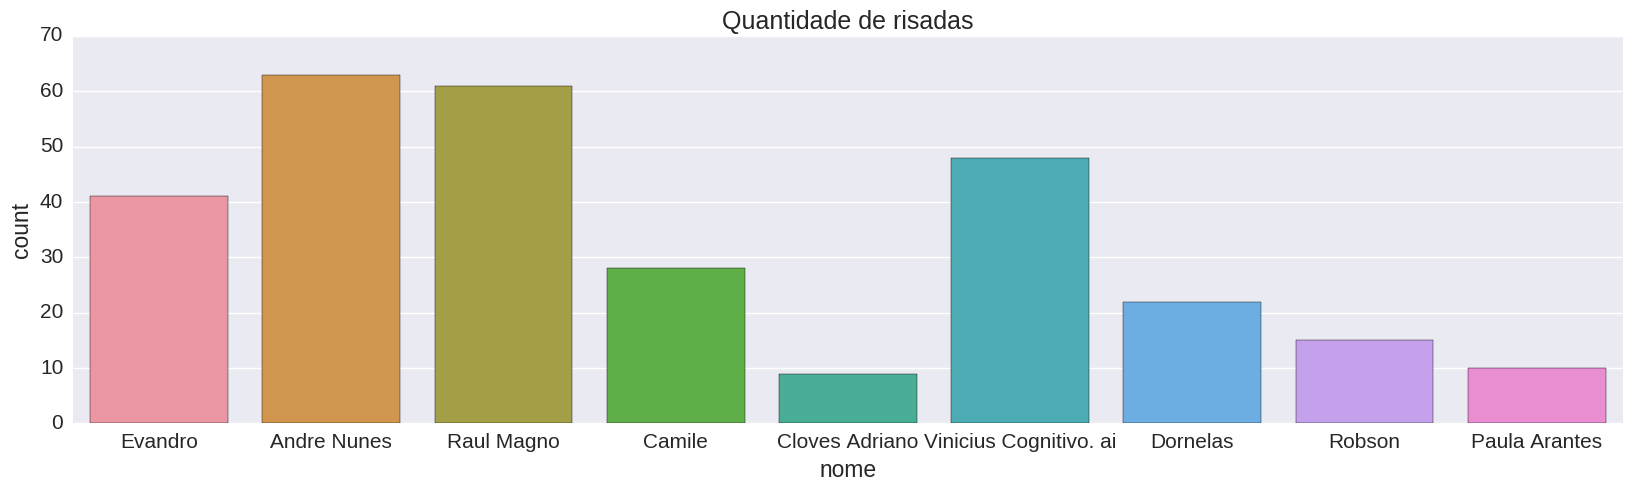

In [222]:
sns.countplot(x='nome', data=df_risadas).set_title('Quantidade de risadas');

In [223]:
def tamanho_da_risada(texto):
    texto = texto.lower()
    if texto.count('k'):
        return texto.count('k')
    if texto.count('ha'):
        return texto.count('ha')
    else:
        None

In [224]:
df_risadas['tamanho_risada'] = [tamanho_da_risada(texto) for texto in df_risadas['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


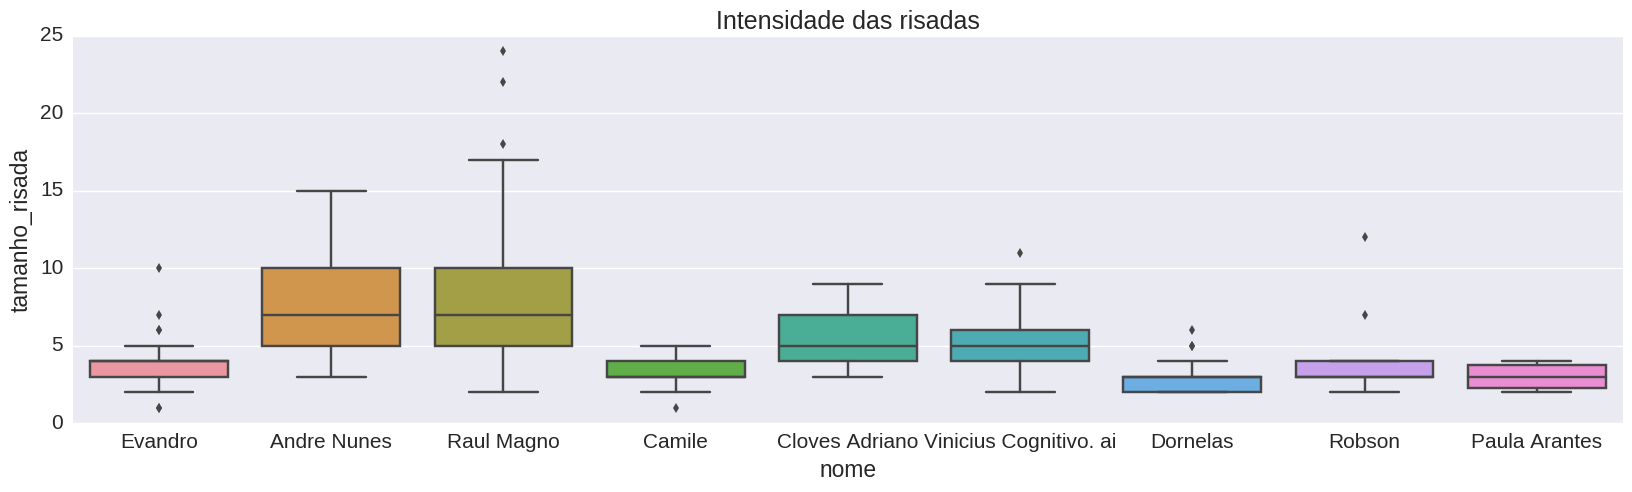

In [225]:
sns.boxplot(x='nome', y='tamanho_risada', data=df_risadas).set_title('Intensidade das risadas');

In [226]:
df2['Midia'] = [palavra_no_texto('<Mídia omitida>\n', texto) for texto in df2['texto']]

In [227]:
df2.head(3)

,data,nome,texto,risada,Midia
4,"21/11/16, 14:27",Evandro,"Cloves, acho que todo mundo já te conhece\n",False,False
5,"21/11/16, 14:27",Evandro,Seja bem vindo\n,False,False
6,"21/11/16, 14:28",Camile,Bem vindooo 🎉\n,False,False


In [228]:
midia = df2[df2['Midia'] == True]

In [229]:
midia.head(3)

,data,nome,texto,risada,Midia
76,"25/11/16, 22:16",Raul Magno,<Mídia omitida>\n,False,True
81,"25/11/16, 22:31",Evandro,<Mídia omitida>\n,False,True
213,"02/12/16, 10:58",Camile,<Mídia omitida>\n,False,True


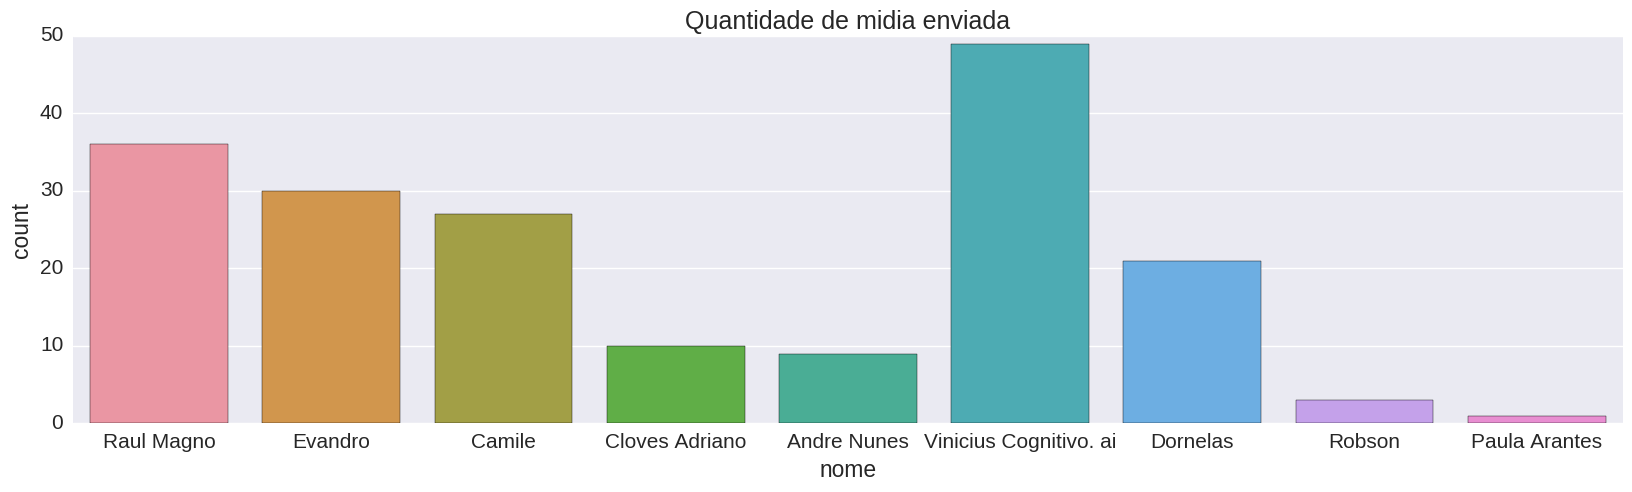

In [230]:
sns.countplot(x='nome', data=midia).set_title('Quantidade de midia enviada');

In [231]:
df2['ruim'] =  [palavra_no_texto('ruim', texto) or 
                palavra_no_texto('mal', texto) or
                palavra_no_texto('bad', texto) or
                palavra_no_texto('triste', texto) or
                palavra_no_texto('infeliz', texto)
                for texto in df2['texto']]

In [232]:
ruim = df2[df2['ruim'] == True]

In [233]:
ruim.head()

,data,nome,texto,risada,Midia,ruim
558,"19/12/16, 23:35",Camile,"Aai tinha esquecido, aqui as fotos de sabado!\n",False,False,True
651,"21/12/16, 16:51",Evandro,bad hein\n,False,False,True
963,"10/01/17, 21:02",Evandro,Mal o atraso\n,False,False,True
981,"11/01/17, 13:11",Camile,Posso mandar mas so consigo fazer aquele nego...,False,False,True
1184,"23/01/17, 22:24",Evandro,Que bad galera\n,False,False,True


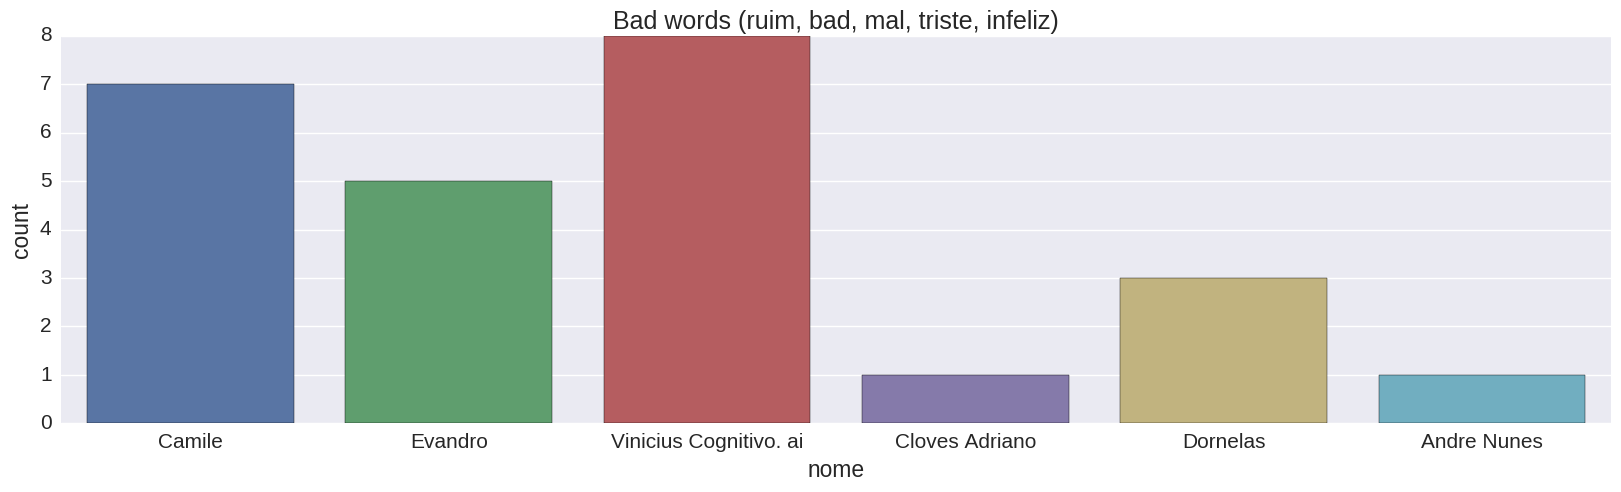

In [234]:
sns.countplot(x='nome', data=ruim).set_title('Bad words (ruim, bad, mal, triste, infeliz)');

In [235]:
ruim2 = df2[(df2['ruim'] == True) & (df2['risada'] == False)]

In [236]:
ruim2.head()

,data,nome,texto,risada,Midia,ruim
558,"19/12/16, 23:35",Camile,"Aai tinha esquecido, aqui as fotos de sabado!\n",False,False,True
651,"21/12/16, 16:51",Evandro,bad hein\n,False,False,True
963,"10/01/17, 21:02",Evandro,Mal o atraso\n,False,False,True
981,"11/01/17, 13:11",Camile,Posso mandar mas so consigo fazer aquele nego...,False,False,True
1184,"23/01/17, 22:24",Evandro,Que bad galera\n,False,False,True


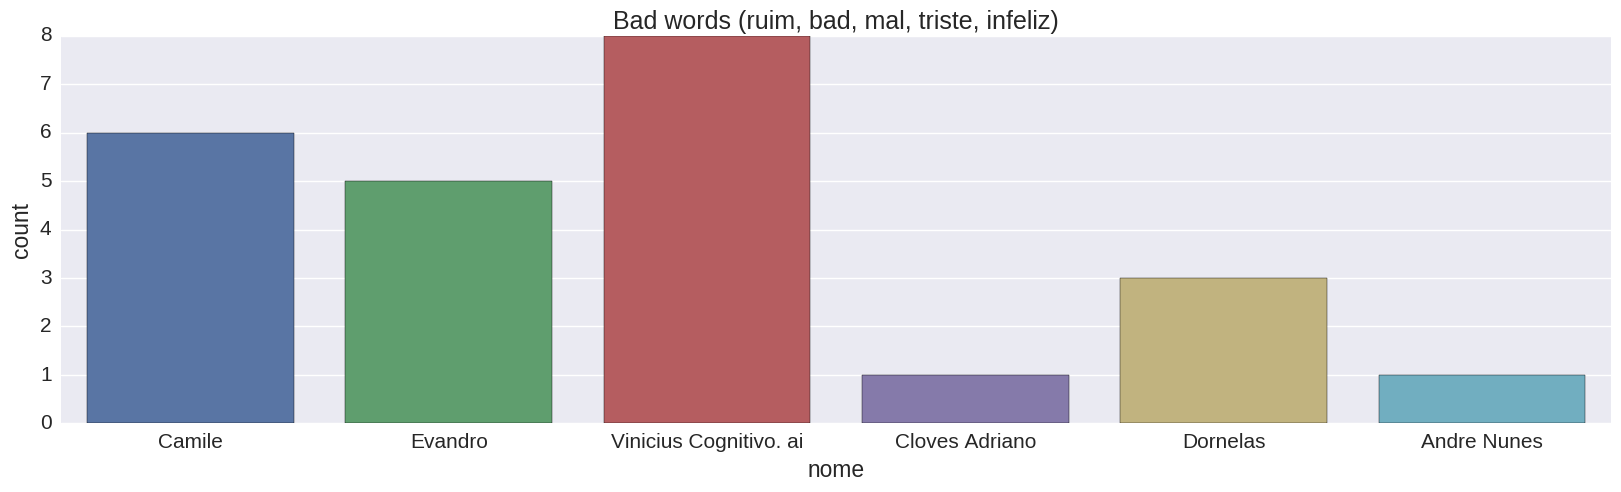

In [237]:
sns.countplot(x='nome', data=ruim2).set_title('Bad words (ruim, bad, mal, triste, infeliz)');

In [238]:
df2['negatividade'] = [palavra_no_texto('não', texto) for texto in df2['texto']]

In [239]:
negatividade = df2[df2['negatividade'] == True]

In [240]:
negatividade.head()

,data,nome,texto,risada,Midia,ruim,negatividade
30,"21/11/16, 19:43",Evandro,Não consegui cortar :+\n,False,False,False,True
191,"01/12/16, 15:38",Evandro,Não estamos conseguindo entrar na mesma sala\n,False,False,False,True
307,"09/12/16, 10:13",Evandro,Acho que não\n,False,False,False,True
482,"14/12/16, 19:37",Raul Magno,"Mas temos alguns aprendizados, amanha quero c...",False,False,False,True
528,"19/12/16, 07:41",Cloves Adriano,"pessoal, hj não irei para empiricus\n",False,False,False,True


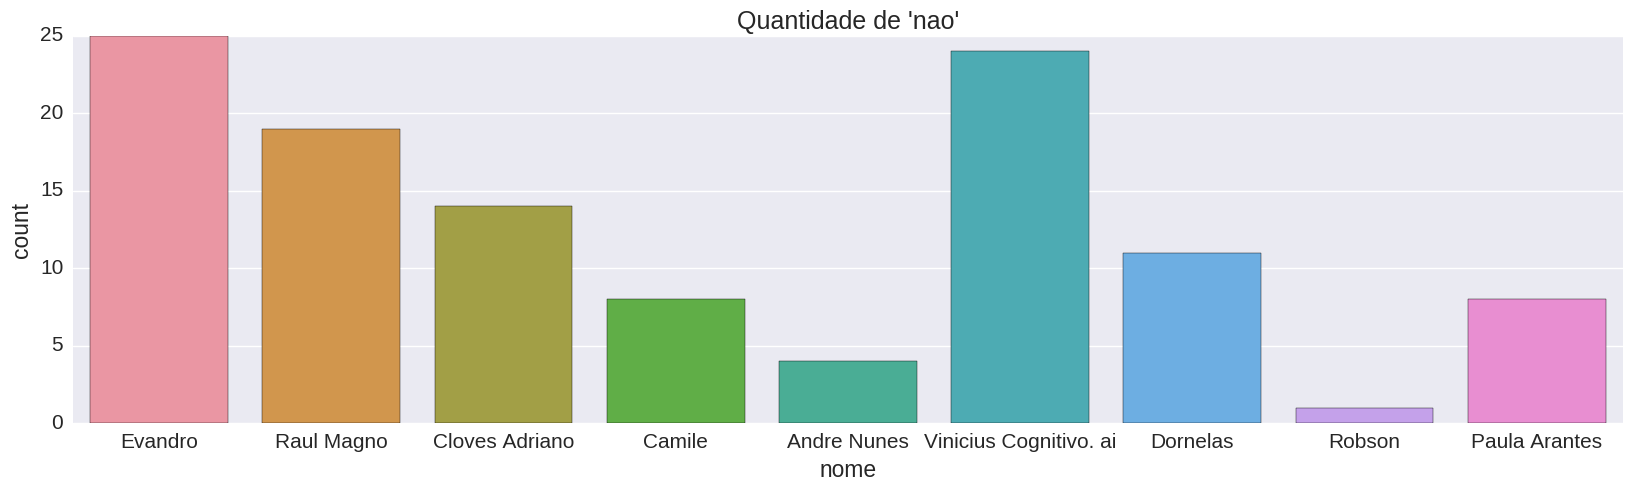

In [241]:
sns.countplot(x='nome', data=negatividade).set_title("Quantidade de 'nao'");

In [242]:
df2['sim'] = [palavra_no_texto('sim', texto) for texto in df2['texto']]

In [243]:
sim = df2[df2['sim'] == True]

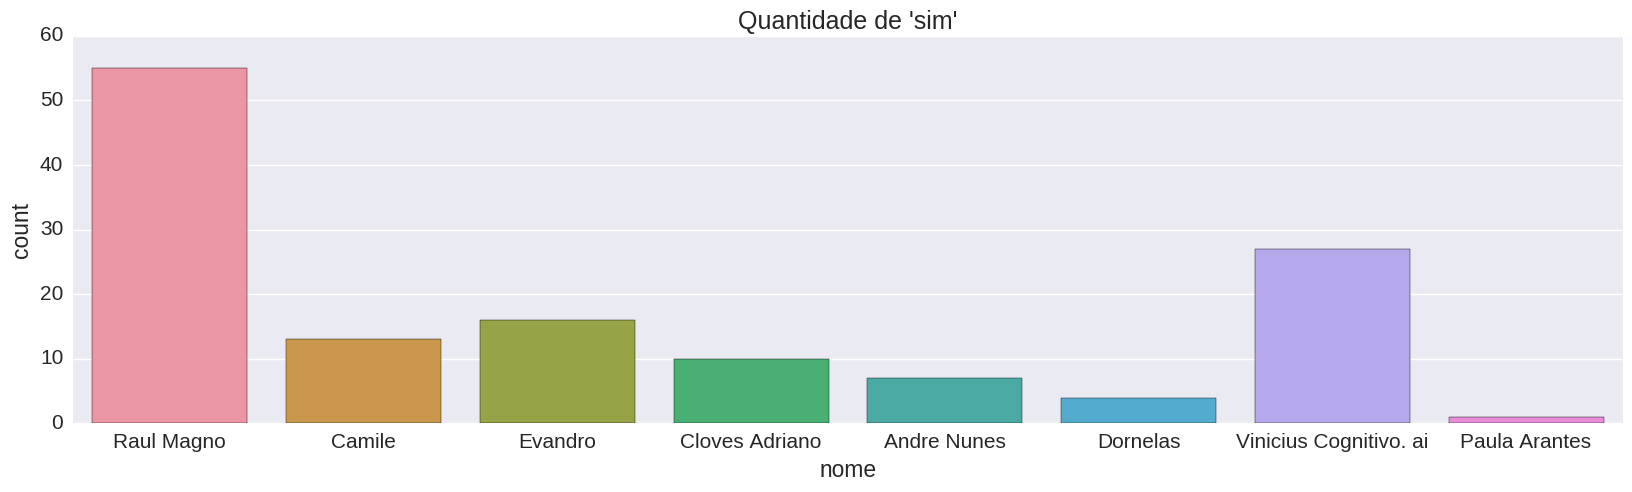

In [244]:
sns.countplot(x='nome', data=sim).set_title("Quantidade de 'sim'");

In [245]:
df2['positividade'] = [palavra_no_texto('boa', texto) or
                      palavra_no_texto('legal', texto) or
                      palavra_no_texto('feliz', texto) or
                      palavra_no_texto('alegre', texto) or
                      palavra_no_texto('contente', texto) or
                      palavra_no_texto('alegria', texto) or
                      palavra_no_texto('felicidade', texto) or
                      palavra_no_texto('bem', texto)  for texto in df2['texto']]

In [246]:
positividade = df2[df2['positividade'] == True]

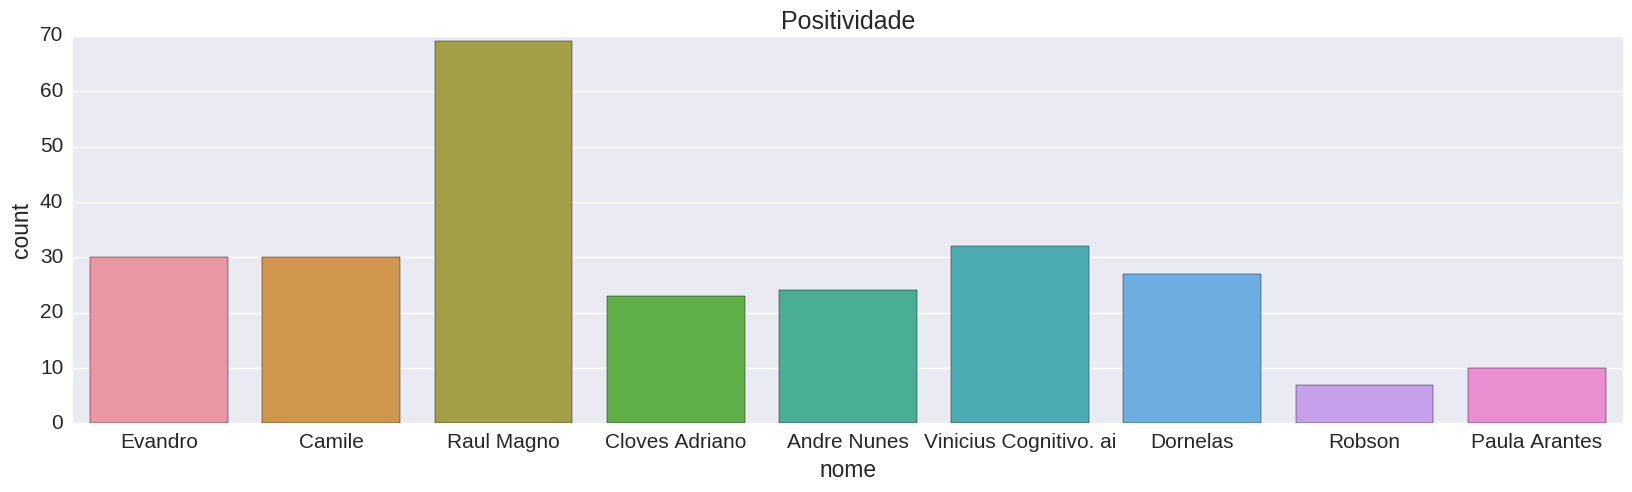

In [247]:
sns.countplot(x='nome', data=positividade).set_title("Positividade");

In [248]:
df2['viajante'] = [palavra_no_texto('viagem', texto) or
                  palavra_no_texto('viajando', texto) or
                  palavra_no_texto('viajar', texto) or
                  palavra_no_texto('viajarei', texto) for texto in df2['texto']]

In [249]:
viajante = df2[df2['viajante'] == True]

In [250]:
viajante

,data,nome,texto,risada,Midia,ruim,negatividade,sim,positividade,viajante
1332,"03/02/17, 08:29",Raul Magno,Boa viagem\n,False,False,False,False,False,True,True
2611,"30/03/17, 23:12",Raul Magno,Boa viagem\n,False,False,False,False,False,True,True
4666,"15/06/17, 11:26",Vinicius Cognitivo. ai,Menos a camile que tá viajando\n,False,False,False,False,False,False,True
4927,"26/06/17, 09:39",Robson,"Estou em BH, vou viajar daqui a apouco e a ta...",False,False,False,False,False,False,True
5185,"05/07/17, 09:14",Paula Arantes,Eu vou de cabify porque estou levando os dois...,False,False,False,True,False,False,True


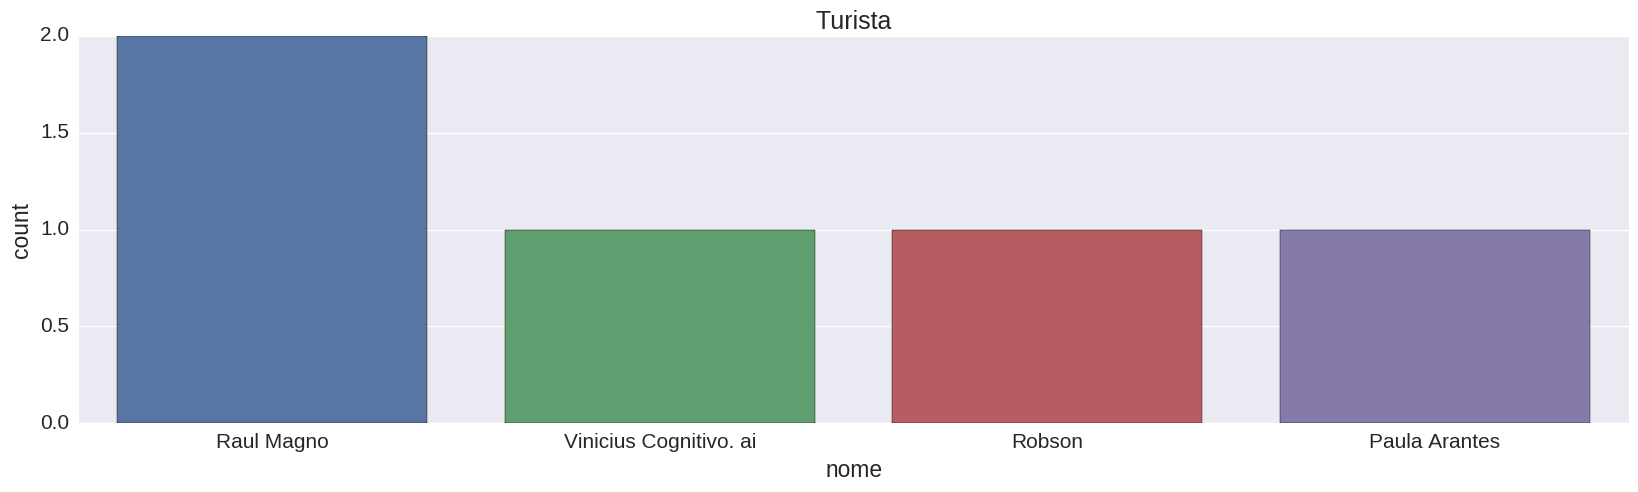

In [251]:
sns.countplot(x='nome', data=viajante).set_title("Turista");